## Homework from Team 2 (John)

** Authors: Liling HUANG, Zhangjie LV, Kaisheng LIAN, Yuhong ZHU, Shurui LIU **

** Date: 2018 / 01/ 29 **

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import linal

* Solution 1

In [372]:
### Calculating the evalues and evectors 
import numpy as np
import scipy as sci
A= np.loadtxt('matrix_data.txt') 
a,b=np.linalg.eig(A)
print(a.max())

### Calculating the gap.
v=np.ones(10).reshape(10,1)
i=80058
B=np.matrix(A)
%time (np.linalg.norm(B**i*v))**(1/i)-a.max()

1.00442776945
Wall time: 1.51 ms


1.4994401860590756e-05

* Solution 2

In [341]:
import numpy as np
import scipy.linalg as la
A = pd.read_csv('matrix_data.txt',header=None,sep=' ')
A_array = A.values
eigen_A = la.eigvals(A)
rA = np.abs(eigen_A).max()
##by the way, here we would like to show some other ideas to prove LSR, 
##and we will also expand on why the second one can prove this LSR theorem
def la_check_LSR(matrix, initial_v , i = 100):
    #first of all, get all eigen_val and eigen_vec 
    mixed_eig = la.eig(A_array)
    eigen_val = mixed_eig[0]
    eigen_vec = mixed_eig[1]
    #second, input v with all elements positive, and decomp v into linear combination of eigen_vectors, i.e. solve linear equations
    decomp_v2base = la.solve(eigen_vec,initial_v) ##array of coefficients 
    ##since all eigen_vector are linear indepedent, all required v can be generated
    Ai_v = np.zeros(10)
    for j in range(10):
        Ai_v = Ai_v + decomp_v2base[j]*(eigen_val[j]**i)*eigen_vec[j] #Here we exploit the property of eigen value
        
    result =  np.power(Ai_v.T @ Ai_v,1/i) - rA 
    
    return result

In [355]:
%time la_check_LSR(A_array,v,80000)

Wall time: 2.01 ms


(0.0044732167031698022+0j)

** Exercise 2 **

In [369]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Timeseries:
    def __init__(self, x0, α =4, n = 1000 ,k = 100):
        self.x0 , self.α, self.n, self.k = x0, α, n, k
    
    def compute_timeseries(self):
        self.xx = [x0]
        x = self.x0
        for j in range(self.n - 1):
            x = self.α * x * (np.ones(self.k) - x)
            self.xx.append(x) 
        return self.xx
    
    def plot(self):
        self.xx = pd.DataFrame(self.xx)
        fig =plt.figure()
        for i in range(self.k):
            x_values = self.xx[i].values
            ax = fig.add_subplot(10,10, i + 1 )
            ax.hist(x_values)
            
        plt.show()
 

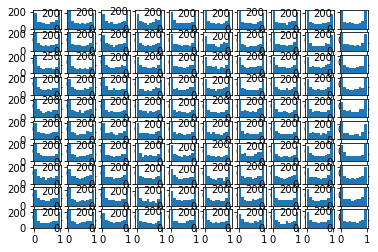

Wall time: 10 s


In [371]:
%%time
x0 = np.random.uniform(0,1,100)
ts = Timeseries(x0)
pp = pd.DataFrame(ts.compute_timeseries())
ts.plot()

We observe that this solution is the fatest one.  And they all look alike.